## 5 - Differentiate a Function

- In this section we will differentiate a given function using three methods: Dual, analytical, numerical
- We will analyse and compare the methods using plots 

In [13]:
from DualNum import Dual
from DualNum_c import Dual_c
from Dual import compute_derivative
import matplotlib.pyplot as plt
import math
import numpy as np

### Functions that return the derivate value at any given x value:


In [14]:
def f(x):
    return (x.sin()).log() + ((x * x) * x.cos())

In [20]:
deriv_value = compute_derivative(f, 1.5, Dual)

def diff_analytic(x):
    return (math.cos(x) / math.sin(x)) + (2*x*math.cos(x)) - (x*x*math.sin(x))

def diff_numerical(x, h):
    return ((math.log(math.sin(x + h)) + (x+h)*(x+h)*math.cos(x+h)) - (math.log(math.sin(x)) + x*x*math.cos(x))) / h

In [21]:
print(f'The automatic derivative using Duals of log(sin(x)) + x*x*cos(x) = {deriv_value}')
print(f'The analytic derivative of log(sin(x)) + x*x*cos(x) = {diff_analytic(1.5)}')
print(f'The numerical derivative of log(sin(x)) + x*x*cos(x) = {diff_numerical(1.5, 1e-10)}')

The automatic derivative using Duals of log(sin(x)) + x*x*cos(x) = -1.9612372705533612
The analytic derivative of log(sin(x)) + x*x*cos(x) = -1.9612372705533612
The numerical derivative of log(sin(x)) + x*x*cos(x) = -1.9612381163547354


### Plotting the converegnce of the numerical method to the analytic solution

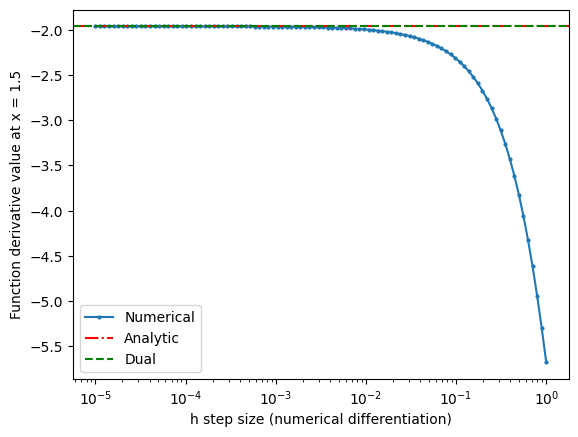

In [22]:

h_values = [10**i for i in np.linspace(-5, 0, 100)]

plt.figure(dpi = 100)
plt.plot(h_values, [diff_numerical(1.5,h) for h in h_values], label = 'Numerical', marker = 'o', markersize = 2)    
plt.axhline(y = diff_analytic(1.5), color = 'r', label = f'Analytic', linestyle = '-.')
plt.axhline(y = diff_dual(1.5).dual, color = 'g', label = 'Dual', linestyle = '--')
plt.xscale('log')
plt.xlabel('h step size (numerical differentiation)')
plt.ylabel('Function derivative value at x = 1.5')
plt.legend()


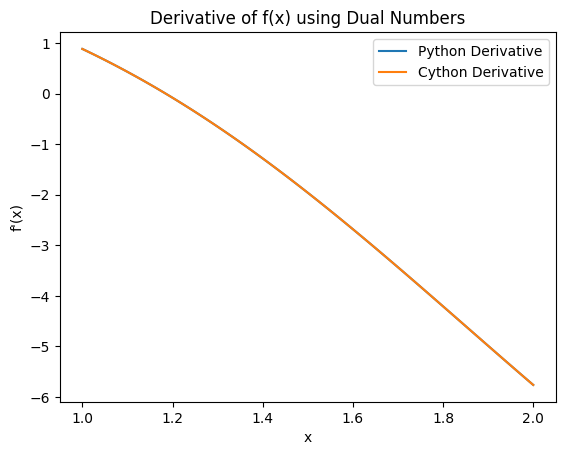

In [29]:

x_vals = np.linspace(1.0, 2.0, 100)
derivatives_python = [compute_derivative(f, x, Dual) for x in x_vals]
derivatives_cython = [compute_derivative(f, x, Dual_c) for x in x_vals]

plt.plot(x_vals, derivatives_python, label="Python Derivative")
plt.plot(x_vals, derivatives_cython, label="Cython Derivative")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.title("Derivative of f(x) using Dual Numbers")
plt.show()

## 9 - Comparison between the pure python and cythonized packages

In [23]:
from DualNum import Dual
from DualNum_c import Dual_c
import timeit
import matplotlib.pyplot as plt

In [24]:
x = Dual(1.5, 1)
y = Dual_c(1.5, 1)

In [25]:
def benchmark_normal():
    x = Dual(2, 1)
    for _ in range(1000):
        x = x + x.sin()


def benchmark_cython():
    x = Dual_c(2, 1)
    for _ in range(1000):
        x = x + x.sin()

# Measure the performance
normal_time = timeit.timeit(benchmark_normal, number=100)
cython_time = timeit.timeit(benchmark_cython, number=100)

print(f"Normal version time: {normal_time:.4f} seconds")
print(f"Cythonized version time: {cython_time:.4f} seconds")
print(f"Speedup: {normal_time / cython_time:.2f}x")

Normal version time: 0.2066 seconds
Cythonized version time: 0.0816 seconds
Speedup: 2.53x


In [26]:
normal = []
cyth = []

for i in range (10,100):
    normal.append(timeit.timeit(benchmark_normal, number=i))
    cyth.append(timeit.timeit(benchmark_cython, number=i))



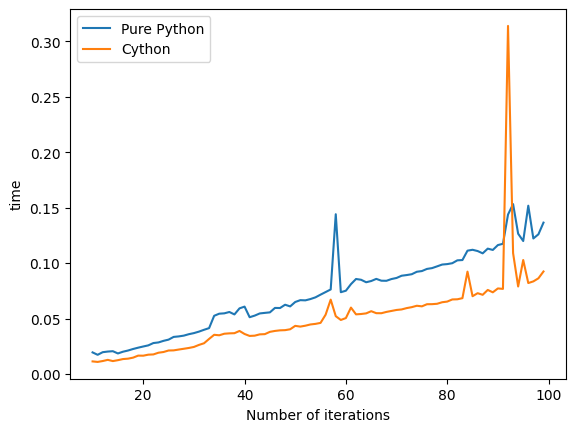

In [27]:
plt.plot(range(10,100), normal, label = 'Pure Python')
plt.plot(range(10,100), cyth, label = 'Cython')
plt.xlabel('Number of iterations')
plt.ylabel('time')
plt.legend()

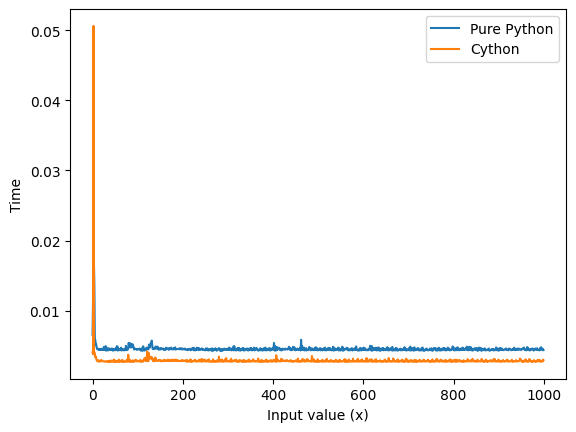

In [30]:
normal = []
cyth = []

# inputs = np.linspace(1, 3, 10000)
# for i in inputs:
for _ in range(0,1000):
    elapsed_normal = timeit.timeit(lambda: diff_dual(1.5), number=1000)
    elapsed_cython = timeit.timeit(lambda: diff_dual_c(1.5), number=1000)
    normal.append(elapsed_normal)
    cyth.append(elapsed_cython)

plt.plot(range(0,1000), normal, label = 'Pure Python')
plt.plot(range(0,1000), cyth, label = 'Cython')
plt.xlabel('Input value (x)')
plt.ylabel('Time')
plt.legend()

    